In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [5]:
df = pd.read_csv("../input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from scipy import interp
import itertools
%matplotlib inline

In [7]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)


In [8]:
#observe the different feature types present in the given dataset:
df.shape
#(284807, 31)

(284807, 31)

In [9]:
#df describe:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
#Info DF:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
#Checking the DataFrame have any Null values:
df.isnull().sum(axis=1).any()

False

Here we will observe the distribution of our Target Feature Class:


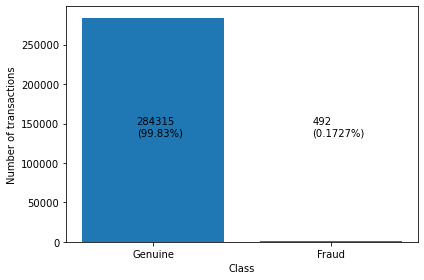

In [12]:

# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations:
# creating a function to plot both numbers & percentages:
plt.bar(['Genuine','Fraud'], df['Class'].value_counts())
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.tight_layout()
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[0], 
                                   df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.show()

Infeerence: 
There are no "Null" values, so we don't have to work on ways to replace values.
Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.

In [13]:
#DF uniqueness Check:

df['Class'].nunique()

2

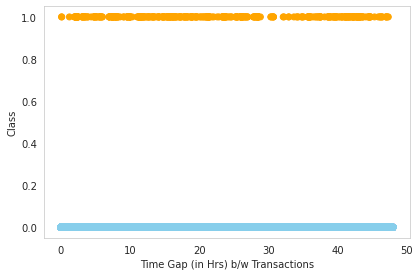

In [14]:
# Create a scatter plot to observe the distribution of classes with time
sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylabel('Class')
plt.xlabel('Time Gap (in Hrs) b/w Transactions')
plt.tight_layout()
color= ['skyblue' if l == 0 else 'Orange' for l in df['Class']]
plt.scatter(df['Time']/(60*60), df['Class'], color=color)

Inference:
          
         The data was collected over the period of 48 Hours and apparently, the 'Time' variable isn't a good predictor for frauds. 
  
        As seen above, the pattern for both non-fradulent and fraudulent transactions seems to be random regarding the hour of the day.So this feature as well not a value added to Model.


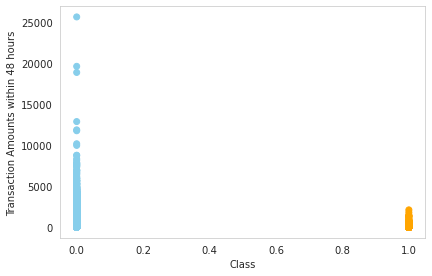

In [15]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Class')
plt.ylabel('Transaction Amounts within 48 hours')
plt.tight_layout()
color= ['skyblue' if l == 0 else 'Orange' for l in df['Class']]
plt.scatter( df['Class'], df['Amount'],color=color)

Inference: 
                    
               Above plots indicate that fraudulent transactions are at smaller values when compared to non-fraudulent transactions. So this feature as well not much value added.


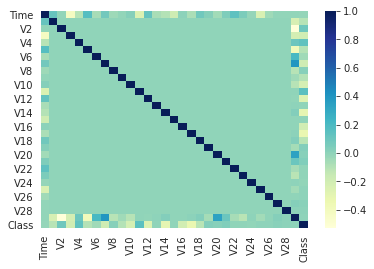

In [16]:
# Drop unnecessary columns 
#Hint: Visualize Heatmap:Corr & findout relevant columns here.
corr = df.corr()
sns.heatmap(corr,cmap='YlGnBu')

Inference: 
                        
        We can see that all features have very low correlation coefficients among each other, and especially low correlation with the 'Class' feature.
        Because data have PCA components.


In [ ]:

#Sorted(desc) Features with absolute correlation:
df_corr  = df.drop("Class", axis=1).apply(lambda x: x.corr(df.Class)).abs().sort_values(ascending=False).to_frame().reset_index()
df_corr.columns = ['features','corr_values']
df_corr

req_features = list(df_corr['features'])
print(req_features)

cols = df_corr['features']
cm = np.corrcoef(df[cols].values.T)
f,ax = plt.subplots(figsize=(20,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True, fmt = '.2f', annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values,cmap='YlGnBu')
plt.show()

#Fetching to10 features into list 'a':
arr = req_features[:10]
print(arr)

#Top 25 absolute correlated features with Class:
#Checking does the Time & Amount features fall under top 25 atleast?
top_corr = pd.DataFrame(cols[:25])
top_corr.columns = ['Top Correlated Features for Class:']
top_corr

Inference: Dropping last five features as of now, even though Time & Amount are not much value added, keeping them for further Analysis.

Outliers check:

#Checking Outliers for Amount feature alone:
#Time lies within 48 hours, so no need to perform outlier check.
#Rest of the features are PCA
sns.boxplot(df['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction Amount')
plt.plot()

amount = df[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

DensePlot:

target_0 = df.loc[df['Class'] == 0]
target_1 = df.loc[df['Class'] == 1]
ax1=sns.distplot(target_0[['Amount']], hist=False, color='skyblue', label='Non-fraud')
ax2=sns.distplot(target_1[['Amount']], hist=False, color='Orange', label='Fraud')
ax1.set_xlim(0, max(df[df['Class']==1]['Amount']))
ax2.set_xlim(0, max(df[df['Class']==1]['Amount']))
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density of probability')
plt.show()

df.loc[df['Class'] == 1]['Amount'].describe()

cols

#scatter plot for these top 10 correlated features alone:
sns.set()
arr = req_features[:10]
sns.pairplot(df[arr], size = 2.5)
plt.show()

### Splitting the data into train & test data

y= df['Class']
X = df.drop(columns=['Class'])

X.head()

from sklearn import model_selection
from sklearn.model_selection import train_test_split


np.random.seed(33)
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=33)

## Scaling the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
X_train[['Time', 'Amount']] = min_max_scaler.fit_transform(X_train[['Time','Amount']])

##### Preserve X_test & y_test to evaluate on the test data once you build the model

print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

### Plotting the distribution of a variable

# plot the histogram of a variable from the dataset to see the skewness
# plot for all the columns post findout of relevant columns/featuers 
for col in df.select_dtypes('float'):
    #print(col)
    plt.figure()
    sns.distplot(df[col])

#Plotting the distribution on scaled dataset:
for col in X_train.select_dtypes('float'):
    #print(col)
    plt.figure()
    sns.distplot(X_train[col])

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

pt_y = PowerTransformer()

# PowerTransformer requires a matrix/DataFrame
pt_y.fit(y_train.to_frame())
 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

# plot the histogram of a variable from the dataset again to see the result 
# plot for the TOP 15 features only:
df_xt = pd.DataFrame(data=X_train_pt, columns=X.columns)
df_xt.head()

# plot the histogram of a variable from the dataset to see the skewness
# plot for the TOP 15 features only:
for col in df_xt.select_dtypes('float'):
    #print(col)
    plt.figure()
    sns.distplot(df_xt[col])

Inference: Post powerTransformation data becam Gaussian, We can see the **Amount** feature which is easy to interpret for the same.

## Model Building
- Build different models on the imbalanced dataset and see the result

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=33,class_weight='balanced')
lr.fit(X_train_pt,y_train)



#num_C = ______  #--> list of values
#cv_num =   #--> list of values

y_train_pred=lr.predict(X_train_pt)
y_train_pred[:10]

y_test_pred=lr.predict(X_test)
y_test_pred[:10]

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_test_pred)))
print("Recall : {}".format(metrics.recall_score(y_test,y_test_pred)))
print("Precision : {}".format(metrics.precision_score(y_test,y_test_pred)))
print("Confusion Matrix :\n {}".format(confusion_matrix(y_test,y_test_pred)))

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model=LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

lr_best = LogisticRegression(C=1.0, penalty='l2', solver= 'newton-cg',random_state=33,class_weight='balanced')
lr_best.fit(X_train,y_train)



y_test_pred_best=lr_best.predict(X_test)

print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_test_pred_best)))
print("Recall : {}".format(metrics.recall_score(y_test,y_test_pred_best)))
print("Precision : {}".format(metrics.precision_score(y_test,y_test_pred_best)))
print("Confusion Matrix :\n {}".format(confusion_matrix(y_test,y_test_pred_best)))
print("F1 Score :\n {}".format(f1_score(y_test,y_test_pred_best)))


from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
predicted =cross_val_predict(LogisticRegression(), X,y, cv=10)
print (metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y,predicted))


from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
# generate 2 class dataset
X, y = make_classification( n_classes=2, weights=[0.998, 0.017], flip_y=0, random_state=33)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, y):
	# select rows
	X_train_cv, X_test_cv = X[train_ix], X[test_ix]
	y_train_cv, y_test_cv = y[train_ix], y[test_ix]
	# summarize train and test composition
	# train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
	# test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
	# print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

#Build KNN model
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

knn.score(X_test, y_test)

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)
#fit model to data
knn_gscv.fit(X, y)



knn_gscv.best_params_

knn_gscv.best_score_

k_range = range(1, 11)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()



### Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=33)
dt0.fit(X_train_pt, y_train)

# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt0.predict(X_test_pt)

# Printing classification report
print(classification_report(y_test, y_pred_default))

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(5, 40,5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 33)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,n_jobs=-1,verbose=2)
#tree.fit(X_train_pca, y_train_sm)

tree.fit(X_train_pt, y_train)

# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning the parameter -  min_sample_leaf

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 50, 5)}


# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,n_jobs=-1,verbose=2)

tree.fit(X_train_pt, y_train)

# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True,n_jobs=-1,verbose=2)
tree.fit(X_train_pt, y_train)

# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Create the parameter grid 
param_grid = {
    'max_depth': [3,5,10],
    'min_samples_leaf':[5,10],
    'min_samples_split': [60,75],
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=33)
tree = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
tree.fit(X_train_pt, y_train)

tree.cv_results_

print('We can get accuracy of',tree.best_score_,'using',tree.best_params_)

#Running DT with best parameters
tree_final=tree.best_estimator_

tree_final.fit(X_train_pt,y_train)

def Model_Metrics(y_actual,y_pred):

    confusion = metrics.confusion_matrix(y_actual, y_pred)

    TP = confusion[1,1] # true positive 
    FN = confusion[1,0] # false negatives
    print('Confusion Matrix \n', confusion)
    print("Roc_auc_score :",round(metrics.roc_auc_score(y_actual, y_pred),4))
    print('Sensitivity/Recall :',round(TP / float(TP+FN),4))
    print('Accuracy Score:',round(metrics.accuracy_score(y_actual, y_pred ),4))
    print('precision score : ',round(metrics.precision_score(y_actual, y_pred ),4))

# predict on test data
y_pred_train = tree_final.predict(X_train_pt)
Model_Metrics(y_train,y_pred_train)


# predict on test data
y_pred = tree_final.predict(X_test_pt)
Model_Metrics(y_test,y_pred)


def predict_Churn(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    y_predicted = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':y_predicted})
    # Creating new column 'final_predicted' with 1 if Churn_Prob>cutoff probability else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    #print relevant metrics
    Model_Metrics(y_df.churn,y_df.final_predicted)
    return y_df


#predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predict_Churn(tree_final,X_train_pt,y_train,cut_off_prob)
y_train_df.head()


def Optimal_Cutoff(data):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        data[i] = data.churn_Prob.map( lambda x: 1 if x > i else 0)
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

    prob = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in prob:
        cm1 = metrics.confusion_matrix(data.churn, data[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
    plt.show()

# finding cut-off with the right balance of the metrices
Optimal_Cutoff(y_train_df)

cut_off_prob=0.1
y_test_df= predict_Churn(tree_final,X_train_pt,y_train,cut_off_prob)
y_test_df.head()

y_test_df= predict_Churn(tree_final,X_test_pt,y_test,cut_off_prob)
y_test_df.head()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

# Taking only odd integers as K values to apply the majority rule. 
k_range = np.arange(1, 20, 2)
#to store cross val score for each k
scores = []
k_range

# Finding the best k with stratified K-fold method. 
# We will use cv=3 in cross_val_score to specify the number of folds in the (Stratified)KFold.

for k in k_range:
  knn_clf = KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train,y_train)
  score = cross_val_score(knn_clf, X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

#Plotting a line plot to decide optimum value of K

plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(k_range,mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(k_range,scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

#Fitting the best parameter to the model
# 3 fold cross validation with K=3

knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)

 Checking AUC 

clf_score(knn_clf)

Inference: The KNN model with imbalanced data gives AUC of 0.94 which is pretty good but recall is 0.77 which is the score we should look to improve in this case.

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

# clf = ___  #initialise the model with optimum hyperparameters
# clf.fit(X_train, y_train)
# print --> #print the evaluation score on the X_test by choosing the best evaluation metric

**RANDOM FOREST CLASSIFICATION:**

#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
rfc = RandomForestClassifier()
clf_rfc_cv = GridSearchCV(rfc, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

#Fitting model and plotting ROC

rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_clf = rf.fit(X_train,y_train)

#Plotting ROC
clf_score(RFC_clf)

**XGBOOST:**

#Import libraries
from xgboost import XGBClassifier
from scipy import stats

#XGBoost classifier:
xgbst = XGBClassifier()

param_xgb = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

clf_xgb_cv = GridSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1)
clf_xgb_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
print("accuracy :",clf_xgb_cv.best_score_)

#Fitting the model with best parameters.

xgbst = XGBClassifier(n_estimators=150,max_depth=5,min_child_weight=3)

xgb_clf = xgbst.fit(X_train,y_train)

#Plotting ROC
clf_score(xgb_clf)


Inference: We are getting AUC of 0.98 with f1-score of 0.86 which is good.
Recall is 0.78 which is better than our other models.
Proceed with the model which shows the best result
Out of the 5 models XGBoost performed the best with AUC of 0.98 and Recall of 0.78.

clf = XGBClassifier(n_estimators=150,max_depth=5,min_child_weight=3)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

# print the evaluation score on the X_test by choosing the best evaluation metric
clf_score(clf)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

### Random Oversampling

from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 













### Print the class distribution after applying SMOTE 

import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)